# Sine sum tests

In [1]:
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error 
import numpy as np
from pandas.plotting import lag_plot
import pandas as pd
from math import floor
from timeit import default_timer as timer
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import itertools
import sys
%matplotlib inline

In [2]:
sys.path.append('../libraries/')
from signalgen import *

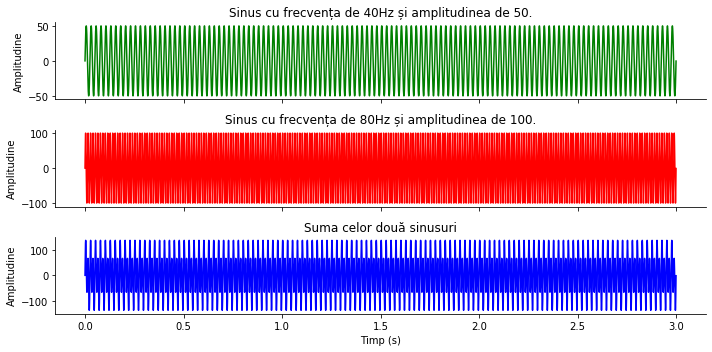

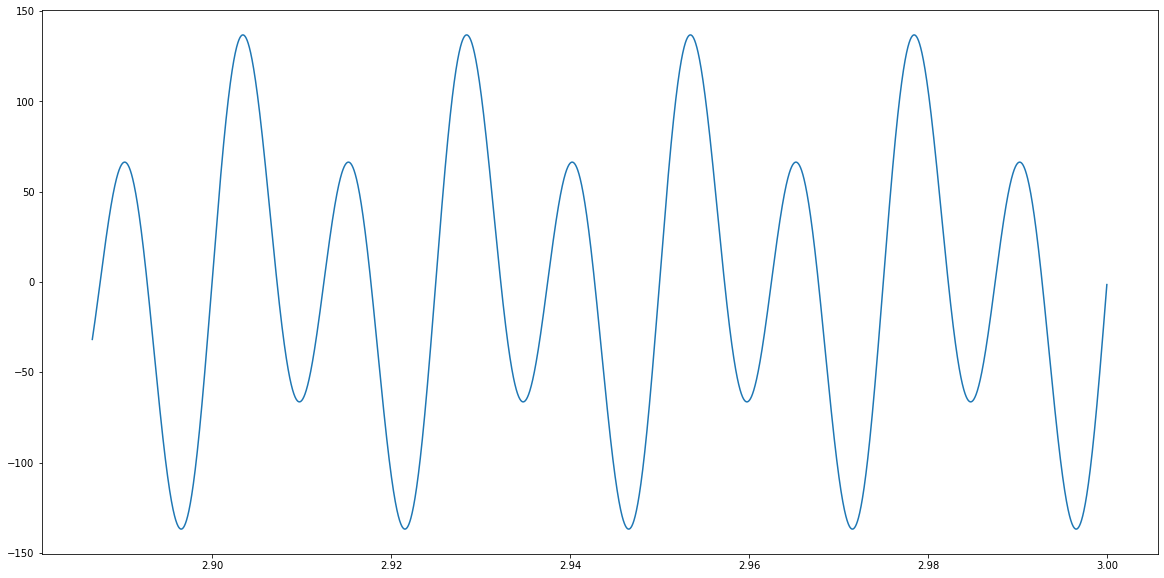

In [3]:
sample_rate = 44100
frequency1 = 40
amplitude1 = 50
frequency2 = 80
amplitude2 = 100
x,y, sine1, sine2 = sine_sum(3, sample_rate, frequency1, amplitude1, frequency2, amplitude2)

fig, ax = plt.subplots(nrows = 3, sharex=True, figsize=(10, 5))
ax[0].set_title(f'Sinus cu frecvența de {frequency1}Hz și amplitudinea de {amplitude1}.')
ax[0].plot(x, sine1, c='g')
ax[0].set_ylabel('Amplitudine')
ax[1].plot(x, sine2, c='red')
ax[1].set_ylabel('Amplitudine')
ax[1].set_title(f'Sinus cu frecvența de {frequency2}Hz și amplitudinea de {amplitude2}.')
ax[2].plot(x, y, c = 'blue')
ax[2].set_ylabel('Amplitudine')
ax[2].set_xlabel('Timp (s)')
ax[2].set_title(f'Suma celor două sinusuri')
spines = ['right', 'top']

for current_ax in ax:
    for portion in spines:
        current_ax.spines[portion].set_visible(False)
        

fig.tight_layout()
plt.show()
fig.savefig('sine_sum.png')
    
# plt.figure(figsize=(20,10))
# plt.xlabel('Timp(s)')
# plt.ylabel('Amplitudine')
# plt.plot(x,y, c='b')

plt.figure(figsize=(20, 10))
plt.plot(x[-5000:], y[-5000:])
plt.savefig('sine_sum_simple.png')

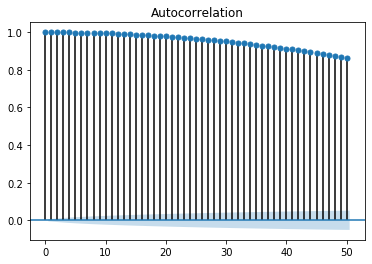

<Figure size 432x288 with 0 Axes>

In [4]:
plot_acf(y, lags=50)
plt.show()
plt.savefig('si')

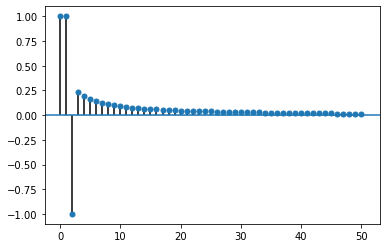

In [5]:
plot_pacf(y, lags=50, title="", method='ywm')
plt.savefig('sine_sum_pacf.png')

In [6]:
train, test = y[1:len(x) - 1024], y[len(x) - 1024:]
x_test = x[len(x) - 1024:]
plt.plot(train)

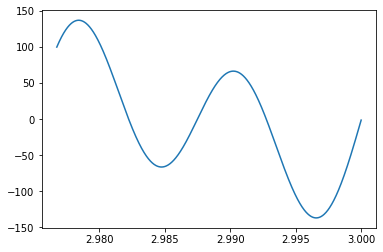

In [7]:
plt.plot(x[len(x) - 1024:], test)
plt.savefig('')

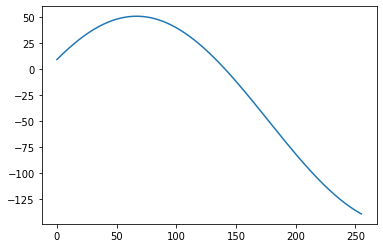

In [138]:
samples_used = 256
plt.plot(train[-samples_used:])

In [139]:
train_series = pd.Series(train)
train_diff = train_series.diff()
len(train)

131275

In [140]:
len(train_diff)

131275

Fit time 0.044
Lag: 4
Coefficients: [ 1.12410081e-15  3.99983761e+00 -5.99967523e+00  3.99983762e+00
 -1.00000000e+00]
Prediction time 0.005
Test MAE: 14.430 
Test RMSE: 17.763


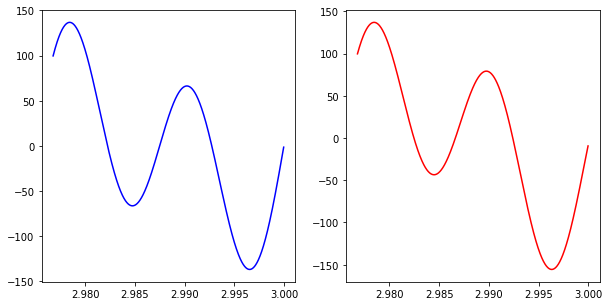

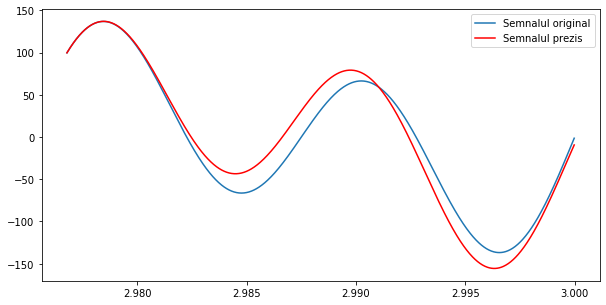

In [23]:
model = AR(train[-896:])
start = timer()
fitted_model = model.fit(ic='aic')
end = timer()
print('Fit time %.3f' % (end - start))
print('Lag: %s' % fitted_model.k_ar)
print('Coefficients: %s' % fitted_model.params)
start = timer()
predictions = fitted_model.predict(start=len(train[-896:]), end=len(train[-896:]) + len(test) - 1, dynamic = False)
end = timer()
print('Prediction time %.3f' % (end - start))
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('Test MAE: %.3f ' % mae)
print('Test RMSE: %.3f' % rmse)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x[len(x) - 1024:], test, c='b')
ax[1].plot(x[len(x) - 1024:], predictions, c='red')
plt.savefig('sine_sum_first_test.png')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x[len(x) - 1024:], test, label = 'Semnalul original')
plt.plot(x[len(x) - 1024:], predictions, c = 'red', label = 'Semnalul prezis')
plt.legend(loc='upper right')
plt.savefig('sine_sum_first_test_overlap.png', fontsize=25)
plt.show()

In [13]:
samples_count = range(128, 1152, 128)


Optimizer name: aic.
Fit time 0.069
Lag: 3
Coefficients: [-3.09998396e-07  2.99989077e+00 -2.99979036e+00  9.99899593e-01]
Prediction time 0.003
Test MAE: 10.149 
Test RMSE: 15.809


Optimizer name: bic.
Fit time 0.050
Lag: 3
Coefficients: [-3.09998396e-07  2.99989077e+00 -2.99979036e+00  9.99899593e-01]
Prediction time 0.005
Test MAE: 10.149 
Test RMSE: 15.809


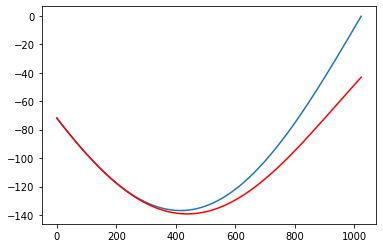

Optimizer name: t-stat.
Fit time 0.054
Lag: 4
Coefficients: [ 6.86117829e-14  3.99999002e+00 -5.99998020e+00  3.99999118e+00
 -1.00000020e+00]
Prediction time 0.003
Test MAE: 11100833353025.373 
Test RMSE: 43258973465113.312


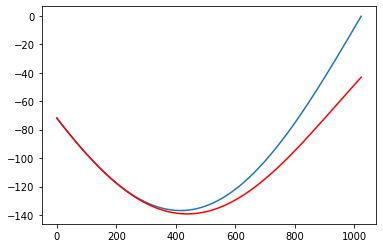

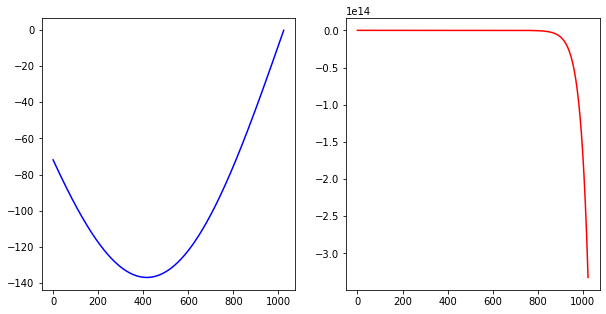

Optimizer name: hqic.
Fit time 0.059
Lag: 3
Coefficients: [-3.09998396e-07  2.99989077e+00 -2.99979036e+00  9.99899593e-01]
Prediction time 0.004
Test MAE: 10.149 
Test RMSE: 15.809


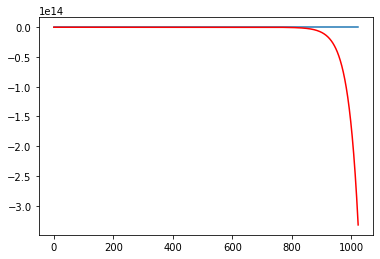

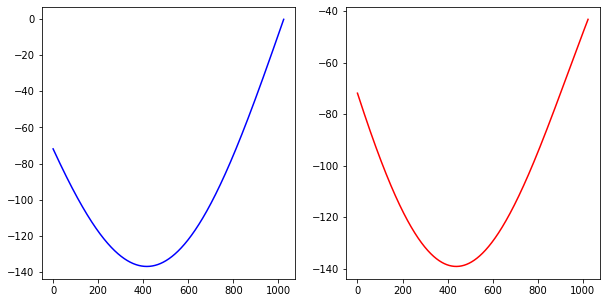

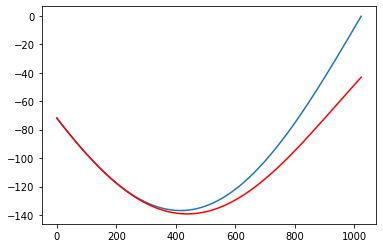

In [14]:
out_data = {}
for optimizer in optimizers:
    print(f'Optimizer name: {optimizer}.')
    model = AR(train[-2205:])
    start = timer()
    fitted_model = model.fit(ic=optimizer)
    end = timer()
    fit_time = end - start
    print('Fit time %.3f' % fit_time)
    print('Lag: %s' % fitted_model.k_ar)
    print('Coefficients: %s' % fitted_model.params)
    start = timer()
    predictions = fitted_model.predict(start=len(train[-2205:]), end=len(train[-2205:]) + len(test) - 1, dynamic = False)
    end = timer()
    prediction_time = end - start
    print('Prediction time %.3f' % prediction_time)
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    print('Test MAE: %.3f ' % mae)
    print('Test RMSE: %.3f' % rmse)

    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    ax[0].plot(test, c='b')
    ax[1].plot(predictions, c='red')
    plt.savefig('sine_sum_first_test.png')
    plt.show()

    plt.plot(test)
    plt.plot(predictions, c = 'red')
    plt.savefig('sine_sum_first_test_overlap.png')
    out_data[optimizer] = [fitted_model.k_ar, mae, rmse, fit_time, prediction_time]

In [15]:
out_data

{'aic': [3,
  10.149333519604921,
  15.808949443951606,
  0.06878710000000865,
  0.002722999999946296],
 'bic': [3,
  10.149333519604921,
  15.808949443951606,
  0.050473799999963376,
  0.005298300000049494],
 't-stat': [4,
  11100833353025.373,
  43258973465113.31,
  0.05367100000000846,
  0.0028751999999485633],
 'hqic': [3,
  10.149333519604921,
  15.808949443951606,
  0.0585495999999921,
  0.0036104000000705128]}

In [16]:
df = pd.DataFrame(out_data)

In [17]:
df

aic        bic        t-stat       hqic
0   3.000000   3.000000  4.000000e+00   3.000000
1  10.149334  10.149334  1.110083e+13  10.149334
2  15.808949  15.808949  4.325897e+13  15.808949
3   0.068787   0.050474  5.367100e-02   0.058550
4   0.002723   0.005298  2.875200e-03   0.003610

In [18]:
np.mean(df.loc[3])

0.057870374999993146

In [20]:
frequencies_list = range(100, 1001, 100)
amplitudes_list = range(100, 1001, 100)
samples_count = range(128, 1152, 128)
optimizers = ['aic', 'bic', 't-stat', 'hqic']

out_data = []
for index, data in enumerate(sine_sum_different_freq_amp(sample_rate, 3, frequencies_list, amplitudes_list, frequencies_list, amplitudes_list)):
    print(f'We\'re testing {index + 1} out of 10000.')
    x, y, fr1, am1, fr2, am2 = data
    train, test = y[1:len(x) - 1024], y[len(x) - 1024:]
    for sample_count in samples_count:
        for optimizer in optimizers:
            model = AR(train[-sample_count:])
            start = timer()
            fitted_model = model.fit(ic=optimizer)
            end = timer()
            fit_time = end - start
            #print('Fit time %.3f' % fit_time)
            #print('Lag: %s' % fitted_model.k_ar)
            #print('Coefficients: %s' % fitted_model.params)
            start = timer()
            predictions = fitted_model.predict(start=len(train[-sample_count:]), end=len(train[-sample_count:]) + len(test) - 1, dynamic = False)
            end = timer()
            prediction_time = end - start
            #print('Prediction time %.3f' % prediction_time)
            mae = mean_absolute_error(test, predictions)
            mse = mean_squared_error(test, predictions)
            rmse = np.sqrt(mse)
            
            out_data.append([sample_count, optimizer, fitted_model.k_ar, mae, rmse, fit_time, prediction_time, fr1, am1, fr2, am2])

Finished generating. Generator version.
We're testing 1 out of 10000.
We're testing 2 out of 10000.
We're testing 3 out of 10000.
We're testing 4 out of 10000.
We're testing 5 out of 10000.
We're testing 6 out of 10000.
We're testing 7 out of 10000.
We're testing 8 out of 10000.
We're testing 9 out of 10000.
We're testing 10 out of 10000.
We're testing 11 out of 10000.
We're testing 12 out of 10000.
We're testing 13 out of 10000.
We're testing 14 out of 10000.
We're testing 15 out of 10000.
We're testing 16 out of 10000.
We're testing 17 out of 10000.
We're testing 18 out of 10000.
We're testing 19 out of 10000.
We're testing 20 out of 10000.
We're testing 21 out of 10000.
We're testing 22 out of 10000.
We're testing 23 out of 10000.
We're testing 24 out of 10000.
We're testing 25 out of 10000.
We're testing 26 out of 10000.
We're testing 27 out of 10000.
We're testing 28 out of 10000.
We're testing 29 out of 10000.
We're testing 30 out of 10000.
We're testing 31 out of 10000.
We're te

We're testing 260 out of 10000.
We're testing 261 out of 10000.
We're testing 262 out of 10000.
We're testing 263 out of 10000.
We're testing 264 out of 10000.
We're testing 265 out of 10000.
We're testing 266 out of 10000.
We're testing 267 out of 10000.
We're testing 268 out of 10000.
We're testing 269 out of 10000.
We're testing 270 out of 10000.
We're testing 271 out of 10000.
We're testing 272 out of 10000.
We're testing 273 out of 10000.
We're testing 274 out of 10000.
We're testing 275 out of 10000.
We're testing 276 out of 10000.
We're testing 277 out of 10000.
We're testing 278 out of 10000.
We're testing 279 out of 10000.
We're testing 280 out of 10000.
We're testing 281 out of 10000.
We're testing 282 out of 10000.
We're testing 283 out of 10000.
We're testing 284 out of 10000.
We're testing 285 out of 10000.
We're testing 286 out of 10000.
We're testing 287 out of 10000.
We're testing 288 out of 10000.
We're testing 289 out of 10000.
We're testing 290 out of 10000.
We're te

We're testing 517 out of 10000.
We're testing 518 out of 10000.
We're testing 519 out of 10000.
We're testing 520 out of 10000.
We're testing 521 out of 10000.
We're testing 522 out of 10000.
We're testing 523 out of 10000.
We're testing 524 out of 10000.
We're testing 525 out of 10000.
We're testing 526 out of 10000.
We're testing 527 out of 10000.
We're testing 528 out of 10000.
We're testing 529 out of 10000.
We're testing 530 out of 10000.
We're testing 531 out of 10000.
We're testing 532 out of 10000.
We're testing 533 out of 10000.
We're testing 534 out of 10000.
We're testing 535 out of 10000.
We're testing 536 out of 10000.
We're testing 537 out of 10000.
We're testing 538 out of 10000.
We're testing 539 out of 10000.
We're testing 540 out of 10000.
We're testing 541 out of 10000.
We're testing 542 out of 10000.
We're testing 543 out of 10000.
We're testing 544 out of 10000.
We're testing 545 out of 10000.
We're testing 546 out of 10000.
We're testing 547 out of 10000.
We're te

We're testing 774 out of 10000.
We're testing 775 out of 10000.
We're testing 776 out of 10000.
We're testing 777 out of 10000.
We're testing 778 out of 10000.
We're testing 779 out of 10000.
We're testing 780 out of 10000.
We're testing 781 out of 10000.
We're testing 782 out of 10000.
We're testing 783 out of 10000.
We're testing 784 out of 10000.
We're testing 785 out of 10000.
We're testing 786 out of 10000.
We're testing 787 out of 10000.
We're testing 788 out of 10000.
We're testing 789 out of 10000.
We're testing 790 out of 10000.
We're testing 791 out of 10000.
We're testing 792 out of 10000.
We're testing 793 out of 10000.
We're testing 794 out of 10000.
We're testing 795 out of 10000.
We're testing 796 out of 10000.
We're testing 797 out of 10000.
We're testing 798 out of 10000.
We're testing 799 out of 10000.
We're testing 800 out of 10000.
We're testing 801 out of 10000.
We're testing 802 out of 10000.
We're testing 803 out of 10000.
We're testing 804 out of 10000.
We're te

We're testing 1030 out of 10000.
We're testing 1031 out of 10000.
We're testing 1032 out of 10000.
We're testing 1033 out of 10000.
We're testing 1034 out of 10000.
We're testing 1035 out of 10000.
We're testing 1036 out of 10000.
We're testing 1037 out of 10000.
We're testing 1038 out of 10000.
We're testing 1039 out of 10000.
We're testing 1040 out of 10000.
We're testing 1041 out of 10000.
We're testing 1042 out of 10000.
We're testing 1043 out of 10000.
We're testing 1044 out of 10000.
We're testing 1045 out of 10000.
We're testing 1046 out of 10000.
We're testing 1047 out of 10000.
We're testing 1048 out of 10000.
We're testing 1049 out of 10000.
We're testing 1050 out of 10000.
We're testing 1051 out of 10000.
We're testing 1052 out of 10000.
We're testing 1053 out of 10000.
We're testing 1054 out of 10000.
We're testing 1055 out of 10000.
We're testing 1056 out of 10000.
We're testing 1057 out of 10000.
We're testing 1058 out of 10000.
We're testing 1059 out of 10000.
We're test

We're testing 1279 out of 10000.
We're testing 1280 out of 10000.
We're testing 1281 out of 10000.
We're testing 1282 out of 10000.
We're testing 1283 out of 10000.
We're testing 1284 out of 10000.
We're testing 1285 out of 10000.
We're testing 1286 out of 10000.
We're testing 1287 out of 10000.
We're testing 1288 out of 10000.
We're testing 1289 out of 10000.
We're testing 1290 out of 10000.
We're testing 1291 out of 10000.
We're testing 1292 out of 10000.
We're testing 1293 out of 10000.
We're testing 1294 out of 10000.
We're testing 1295 out of 10000.
We're testing 1296 out of 10000.
We're testing 1297 out of 10000.
We're testing 1298 out of 10000.
We're testing 1299 out of 10000.
We're testing 1300 out of 10000.
We're testing 1301 out of 10000.
We're testing 1302 out of 10000.
We're testing 1303 out of 10000.
We're testing 1304 out of 10000.
We're testing 1305 out of 10000.
We're testing 1306 out of 10000.
We're testing 1307 out of 10000.
We're testing 1308 out of 10000.
We're test

We're testing 1528 out of 10000.
We're testing 1529 out of 10000.
We're testing 1530 out of 10000.
We're testing 1531 out of 10000.
We're testing 1532 out of 10000.
We're testing 1533 out of 10000.
We're testing 1534 out of 10000.
We're testing 1535 out of 10000.
We're testing 1536 out of 10000.
We're testing 1537 out of 10000.
We're testing 1538 out of 10000.
We're testing 1539 out of 10000.
We're testing 1540 out of 10000.
We're testing 1541 out of 10000.
We're testing 1542 out of 10000.
We're testing 1543 out of 10000.
We're testing 1544 out of 10000.
We're testing 1545 out of 10000.
We're testing 1546 out of 10000.
We're testing 1547 out of 10000.
We're testing 1548 out of 10000.
We're testing 1549 out of 10000.
We're testing 1550 out of 10000.
We're testing 1551 out of 10000.
We're testing 1552 out of 10000.
We're testing 1553 out of 10000.
We're testing 1554 out of 10000.
We're testing 1555 out of 10000.
We're testing 1556 out of 10000.
We're testing 1557 out of 10000.
We're test

We're testing 1777 out of 10000.
We're testing 1778 out of 10000.
We're testing 1779 out of 10000.
We're testing 1780 out of 10000.
We're testing 1781 out of 10000.
We're testing 1782 out of 10000.
We're testing 1783 out of 10000.
We're testing 1784 out of 10000.
We're testing 1785 out of 10000.
We're testing 1786 out of 10000.
We're testing 1787 out of 10000.
We're testing 1788 out of 10000.
We're testing 1789 out of 10000.
We're testing 1790 out of 10000.
We're testing 1791 out of 10000.
We're testing 1792 out of 10000.
We're testing 1793 out of 10000.
We're testing 1794 out of 10000.
We're testing 1795 out of 10000.
We're testing 1796 out of 10000.
We're testing 1797 out of 10000.
We're testing 1798 out of 10000.
We're testing 1799 out of 10000.
We're testing 1800 out of 10000.
We're testing 1801 out of 10000.
We're testing 1802 out of 10000.
We're testing 1803 out of 10000.
We're testing 1804 out of 10000.
We're testing 1805 out of 10000.
We're testing 1806 out of 10000.
We're test

We're testing 2026 out of 10000.
We're testing 2027 out of 10000.
We're testing 2028 out of 10000.
We're testing 2029 out of 10000.
We're testing 2030 out of 10000.
We're testing 2031 out of 10000.
We're testing 2032 out of 10000.
We're testing 2033 out of 10000.
We're testing 2034 out of 10000.
We're testing 2035 out of 10000.
We're testing 2036 out of 10000.
We're testing 2037 out of 10000.
We're testing 2038 out of 10000.
We're testing 2039 out of 10000.
We're testing 2040 out of 10000.
We're testing 2041 out of 10000.
We're testing 2042 out of 10000.
We're testing 2043 out of 10000.
We're testing 2044 out of 10000.
We're testing 2045 out of 10000.
We're testing 2046 out of 10000.
We're testing 2047 out of 10000.
We're testing 2048 out of 10000.
We're testing 2049 out of 10000.
We're testing 2050 out of 10000.
We're testing 2051 out of 10000.
We're testing 2052 out of 10000.
We're testing 2053 out of 10000.
We're testing 2054 out of 10000.
We're testing 2055 out of 10000.
We're test

We're testing 2275 out of 10000.
We're testing 2276 out of 10000.
We're testing 2277 out of 10000.
We're testing 2278 out of 10000.
We're testing 2279 out of 10000.
We're testing 2280 out of 10000.
We're testing 2281 out of 10000.
We're testing 2282 out of 10000.
We're testing 2283 out of 10000.
We're testing 2284 out of 10000.
We're testing 2285 out of 10000.
We're testing 2286 out of 10000.
We're testing 2287 out of 10000.
We're testing 2288 out of 10000.
We're testing 2289 out of 10000.
We're testing 2290 out of 10000.
We're testing 2291 out of 10000.
We're testing 2292 out of 10000.
We're testing 2293 out of 10000.
We're testing 2294 out of 10000.
We're testing 2295 out of 10000.
We're testing 2296 out of 10000.
We're testing 2297 out of 10000.
We're testing 2298 out of 10000.
We're testing 2299 out of 10000.
We're testing 2300 out of 10000.
We're testing 2301 out of 10000.
We're testing 2302 out of 10000.
We're testing 2303 out of 10000.
We're testing 2304 out of 10000.
We're test

We're testing 2524 out of 10000.
We're testing 2525 out of 10000.
We're testing 2526 out of 10000.
We're testing 2527 out of 10000.
We're testing 2528 out of 10000.
We're testing 2529 out of 10000.
We're testing 2530 out of 10000.
We're testing 2531 out of 10000.
We're testing 2532 out of 10000.
We're testing 2533 out of 10000.
We're testing 2534 out of 10000.
We're testing 2535 out of 10000.
We're testing 2536 out of 10000.
We're testing 2537 out of 10000.
We're testing 2538 out of 10000.
We're testing 2539 out of 10000.
We're testing 2540 out of 10000.
We're testing 2541 out of 10000.
We're testing 2542 out of 10000.
We're testing 2543 out of 10000.
We're testing 2544 out of 10000.
We're testing 2545 out of 10000.
We're testing 2546 out of 10000.
We're testing 2547 out of 10000.
We're testing 2548 out of 10000.
We're testing 2549 out of 10000.
We're testing 2550 out of 10000.
We're testing 2551 out of 10000.
We're testing 2552 out of 10000.
We're testing 2553 out of 10000.
We're test

We're testing 2773 out of 10000.
We're testing 2774 out of 10000.
We're testing 2775 out of 10000.
We're testing 2776 out of 10000.
We're testing 2777 out of 10000.
We're testing 2778 out of 10000.
We're testing 2779 out of 10000.
We're testing 2780 out of 10000.
We're testing 2781 out of 10000.
We're testing 2782 out of 10000.
We're testing 2783 out of 10000.
We're testing 2784 out of 10000.
We're testing 2785 out of 10000.
We're testing 2786 out of 10000.
We're testing 2787 out of 10000.
We're testing 2788 out of 10000.
We're testing 2789 out of 10000.
We're testing 2790 out of 10000.
We're testing 2791 out of 10000.
We're testing 2792 out of 10000.
We're testing 2793 out of 10000.
We're testing 2794 out of 10000.
We're testing 2795 out of 10000.
We're testing 2796 out of 10000.
We're testing 2797 out of 10000.
We're testing 2798 out of 10000.
We're testing 2799 out of 10000.
We're testing 2800 out of 10000.
We're testing 2801 out of 10000.
We're testing 2802 out of 10000.
We're test

We're testing 3022 out of 10000.
We're testing 3023 out of 10000.
We're testing 3024 out of 10000.
We're testing 3025 out of 10000.
We're testing 3026 out of 10000.
We're testing 3027 out of 10000.
We're testing 3028 out of 10000.
We're testing 3029 out of 10000.
We're testing 3030 out of 10000.
We're testing 3031 out of 10000.
We're testing 3032 out of 10000.
We're testing 3033 out of 10000.
We're testing 3034 out of 10000.
We're testing 3035 out of 10000.
We're testing 3036 out of 10000.
We're testing 3037 out of 10000.
We're testing 3038 out of 10000.
We're testing 3039 out of 10000.
We're testing 3040 out of 10000.
We're testing 3041 out of 10000.
We're testing 3042 out of 10000.
We're testing 3043 out of 10000.
We're testing 3044 out of 10000.
We're testing 3045 out of 10000.
We're testing 3046 out of 10000.
We're testing 3047 out of 10000.
We're testing 3048 out of 10000.
We're testing 3049 out of 10000.
We're testing 3050 out of 10000.
We're testing 3051 out of 10000.
We're test

We're testing 3271 out of 10000.
We're testing 3272 out of 10000.
We're testing 3273 out of 10000.
We're testing 3274 out of 10000.
We're testing 3275 out of 10000.
We're testing 3276 out of 10000.
We're testing 3277 out of 10000.
We're testing 3278 out of 10000.
We're testing 3279 out of 10000.
We're testing 3280 out of 10000.
We're testing 3281 out of 10000.
We're testing 3282 out of 10000.
We're testing 3283 out of 10000.
We're testing 3284 out of 10000.
We're testing 3285 out of 10000.
We're testing 3286 out of 10000.
We're testing 3287 out of 10000.
We're testing 3288 out of 10000.
We're testing 3289 out of 10000.
We're testing 3290 out of 10000.
We're testing 3291 out of 10000.
We're testing 3292 out of 10000.
We're testing 3293 out of 10000.
We're testing 3294 out of 10000.
We're testing 3295 out of 10000.
We're testing 3296 out of 10000.
We're testing 3297 out of 10000.
We're testing 3298 out of 10000.
We're testing 3299 out of 10000.
We're testing 3300 out of 10000.
We're test

We're testing 3520 out of 10000.
We're testing 3521 out of 10000.
We're testing 3522 out of 10000.
We're testing 3523 out of 10000.
We're testing 3524 out of 10000.
We're testing 3525 out of 10000.
We're testing 3526 out of 10000.
We're testing 3527 out of 10000.
We're testing 3528 out of 10000.
We're testing 3529 out of 10000.
We're testing 3530 out of 10000.
We're testing 3531 out of 10000.
We're testing 3532 out of 10000.
We're testing 3533 out of 10000.
We're testing 3534 out of 10000.
We're testing 3535 out of 10000.
We're testing 3536 out of 10000.
We're testing 3537 out of 10000.
We're testing 3538 out of 10000.
We're testing 3539 out of 10000.
We're testing 3540 out of 10000.
We're testing 3541 out of 10000.
We're testing 3542 out of 10000.
We're testing 3543 out of 10000.
We're testing 3544 out of 10000.
We're testing 3545 out of 10000.
We're testing 3546 out of 10000.
We're testing 3547 out of 10000.
We're testing 3548 out of 10000.
We're testing 3549 out of 10000.
We're test

We're testing 3769 out of 10000.
We're testing 3770 out of 10000.
We're testing 3771 out of 10000.
We're testing 3772 out of 10000.
We're testing 3773 out of 10000.
We're testing 3774 out of 10000.
We're testing 3775 out of 10000.
We're testing 3776 out of 10000.
We're testing 3777 out of 10000.
We're testing 3778 out of 10000.
We're testing 3779 out of 10000.
We're testing 3780 out of 10000.
We're testing 3781 out of 10000.
We're testing 3782 out of 10000.
We're testing 3783 out of 10000.
We're testing 3784 out of 10000.
We're testing 3785 out of 10000.
We're testing 3786 out of 10000.
We're testing 3787 out of 10000.
We're testing 3788 out of 10000.
We're testing 3789 out of 10000.
We're testing 3790 out of 10000.
We're testing 3791 out of 10000.
We're testing 3792 out of 10000.
We're testing 3793 out of 10000.
We're testing 3794 out of 10000.
We're testing 3795 out of 10000.
We're testing 3796 out of 10000.
We're testing 3797 out of 10000.
We're testing 3798 out of 10000.
We're test

We're testing 4018 out of 10000.
We're testing 4019 out of 10000.
We're testing 4020 out of 10000.
We're testing 4021 out of 10000.
We're testing 4022 out of 10000.
We're testing 4023 out of 10000.
We're testing 4024 out of 10000.
We're testing 4025 out of 10000.
We're testing 4026 out of 10000.
We're testing 4027 out of 10000.
We're testing 4028 out of 10000.
We're testing 4029 out of 10000.
We're testing 4030 out of 10000.
We're testing 4031 out of 10000.
We're testing 4032 out of 10000.
We're testing 4033 out of 10000.
We're testing 4034 out of 10000.
We're testing 4035 out of 10000.
We're testing 4036 out of 10000.
We're testing 4037 out of 10000.
We're testing 4038 out of 10000.
We're testing 4039 out of 10000.
We're testing 4040 out of 10000.
We're testing 4041 out of 10000.
We're testing 4042 out of 10000.
We're testing 4043 out of 10000.
We're testing 4044 out of 10000.
We're testing 4045 out of 10000.
We're testing 4046 out of 10000.
We're testing 4047 out of 10000.
We're test

We're testing 4267 out of 10000.
We're testing 4268 out of 10000.
We're testing 4269 out of 10000.
We're testing 4270 out of 10000.
We're testing 4271 out of 10000.
We're testing 4272 out of 10000.
We're testing 4273 out of 10000.
We're testing 4274 out of 10000.
We're testing 4275 out of 10000.
We're testing 4276 out of 10000.
We're testing 4277 out of 10000.
We're testing 4278 out of 10000.
We're testing 4279 out of 10000.
We're testing 4280 out of 10000.
We're testing 4281 out of 10000.
We're testing 4282 out of 10000.
We're testing 4283 out of 10000.
We're testing 4284 out of 10000.
We're testing 4285 out of 10000.
We're testing 4286 out of 10000.
We're testing 4287 out of 10000.
We're testing 4288 out of 10000.
We're testing 4289 out of 10000.
We're testing 4290 out of 10000.
We're testing 4291 out of 10000.
We're testing 4292 out of 10000.
We're testing 4293 out of 10000.
We're testing 4294 out of 10000.
We're testing 4295 out of 10000.
We're testing 4296 out of 10000.
We're test

We're testing 4516 out of 10000.
We're testing 4517 out of 10000.
We're testing 4518 out of 10000.
We're testing 4519 out of 10000.
We're testing 4520 out of 10000.
We're testing 4521 out of 10000.
We're testing 4522 out of 10000.
We're testing 4523 out of 10000.
We're testing 4524 out of 10000.
We're testing 4525 out of 10000.
We're testing 4526 out of 10000.
We're testing 4527 out of 10000.
We're testing 4528 out of 10000.
We're testing 4529 out of 10000.
We're testing 4530 out of 10000.
We're testing 4531 out of 10000.
We're testing 4532 out of 10000.
We're testing 4533 out of 10000.
We're testing 4534 out of 10000.
We're testing 4535 out of 10000.
We're testing 4536 out of 10000.
We're testing 4537 out of 10000.
We're testing 4538 out of 10000.
We're testing 4539 out of 10000.
We're testing 4540 out of 10000.
We're testing 4541 out of 10000.
We're testing 4542 out of 10000.
We're testing 4543 out of 10000.
We're testing 4544 out of 10000.
We're testing 4545 out of 10000.
We're test

We're testing 4765 out of 10000.
We're testing 4766 out of 10000.
We're testing 4767 out of 10000.
We're testing 4768 out of 10000.
We're testing 4769 out of 10000.
We're testing 4770 out of 10000.
We're testing 4771 out of 10000.
We're testing 4772 out of 10000.
We're testing 4773 out of 10000.
We're testing 4774 out of 10000.
We're testing 4775 out of 10000.
We're testing 4776 out of 10000.
We're testing 4777 out of 10000.
We're testing 4778 out of 10000.
We're testing 4779 out of 10000.
We're testing 4780 out of 10000.
We're testing 4781 out of 10000.
We're testing 4782 out of 10000.
We're testing 4783 out of 10000.
We're testing 4784 out of 10000.
We're testing 4785 out of 10000.
We're testing 4786 out of 10000.
We're testing 4787 out of 10000.
We're testing 4788 out of 10000.
We're testing 4789 out of 10000.
We're testing 4790 out of 10000.
We're testing 4791 out of 10000.
We're testing 4792 out of 10000.
We're testing 4793 out of 10000.
We're testing 4794 out of 10000.
We're test

We're testing 5014 out of 10000.
We're testing 5015 out of 10000.
We're testing 5016 out of 10000.
We're testing 5017 out of 10000.
We're testing 5018 out of 10000.
We're testing 5019 out of 10000.
We're testing 5020 out of 10000.
We're testing 5021 out of 10000.
We're testing 5022 out of 10000.
We're testing 5023 out of 10000.
We're testing 5024 out of 10000.
We're testing 5025 out of 10000.
We're testing 5026 out of 10000.
We're testing 5027 out of 10000.
We're testing 5028 out of 10000.
We're testing 5029 out of 10000.
We're testing 5030 out of 10000.
We're testing 5031 out of 10000.
We're testing 5032 out of 10000.
We're testing 5033 out of 10000.
We're testing 5034 out of 10000.
We're testing 5035 out of 10000.
We're testing 5036 out of 10000.
We're testing 5037 out of 10000.
We're testing 5038 out of 10000.
We're testing 5039 out of 10000.
We're testing 5040 out of 10000.
We're testing 5041 out of 10000.
We're testing 5042 out of 10000.
We're testing 5043 out of 10000.
We're test

We're testing 5263 out of 10000.
We're testing 5264 out of 10000.
We're testing 5265 out of 10000.
We're testing 5266 out of 10000.
We're testing 5267 out of 10000.
We're testing 5268 out of 10000.
We're testing 5269 out of 10000.
We're testing 5270 out of 10000.
We're testing 5271 out of 10000.
We're testing 5272 out of 10000.
We're testing 5273 out of 10000.
We're testing 5274 out of 10000.
We're testing 5275 out of 10000.
We're testing 5276 out of 10000.
We're testing 5277 out of 10000.
We're testing 5278 out of 10000.
We're testing 5279 out of 10000.
We're testing 5280 out of 10000.
We're testing 5281 out of 10000.
We're testing 5282 out of 10000.
We're testing 5283 out of 10000.
We're testing 5284 out of 10000.
We're testing 5285 out of 10000.
We're testing 5286 out of 10000.
We're testing 5287 out of 10000.
We're testing 5288 out of 10000.
We're testing 5289 out of 10000.
We're testing 5290 out of 10000.
We're testing 5291 out of 10000.
We're testing 5292 out of 10000.
We're test

We're testing 5512 out of 10000.
We're testing 5513 out of 10000.
We're testing 5514 out of 10000.
We're testing 5515 out of 10000.
We're testing 5516 out of 10000.
We're testing 5517 out of 10000.
We're testing 5518 out of 10000.
We're testing 5519 out of 10000.
We're testing 5520 out of 10000.
We're testing 5521 out of 10000.
We're testing 5522 out of 10000.
We're testing 5523 out of 10000.
We're testing 5524 out of 10000.
We're testing 5525 out of 10000.
We're testing 5526 out of 10000.
We're testing 5527 out of 10000.
We're testing 5528 out of 10000.
We're testing 5529 out of 10000.
We're testing 5530 out of 10000.
We're testing 5531 out of 10000.
We're testing 5532 out of 10000.
We're testing 5533 out of 10000.
We're testing 5534 out of 10000.
We're testing 5535 out of 10000.
We're testing 5536 out of 10000.
We're testing 5537 out of 10000.
We're testing 5538 out of 10000.
We're testing 5539 out of 10000.
We're testing 5540 out of 10000.
We're testing 5541 out of 10000.
We're test

We're testing 5761 out of 10000.
We're testing 5762 out of 10000.
We're testing 5763 out of 10000.
We're testing 5764 out of 10000.
We're testing 5765 out of 10000.
We're testing 5766 out of 10000.
We're testing 5767 out of 10000.
We're testing 5768 out of 10000.
We're testing 5769 out of 10000.
We're testing 5770 out of 10000.
We're testing 5771 out of 10000.
We're testing 5772 out of 10000.
We're testing 5773 out of 10000.
We're testing 5774 out of 10000.
We're testing 5775 out of 10000.
We're testing 5776 out of 10000.
We're testing 5777 out of 10000.
We're testing 5778 out of 10000.
We're testing 5779 out of 10000.
We're testing 5780 out of 10000.
We're testing 5781 out of 10000.
We're testing 5782 out of 10000.
We're testing 5783 out of 10000.
We're testing 5784 out of 10000.
We're testing 5785 out of 10000.
We're testing 5786 out of 10000.
We're testing 5787 out of 10000.
We're testing 5788 out of 10000.
We're testing 5789 out of 10000.
We're testing 5790 out of 10000.
We're test

We're testing 6010 out of 10000.
We're testing 6011 out of 10000.
We're testing 6012 out of 10000.
We're testing 6013 out of 10000.
We're testing 6014 out of 10000.
We're testing 6015 out of 10000.
We're testing 6016 out of 10000.
We're testing 6017 out of 10000.
We're testing 6018 out of 10000.
We're testing 6019 out of 10000.
We're testing 6020 out of 10000.
We're testing 6021 out of 10000.
We're testing 6022 out of 10000.
We're testing 6023 out of 10000.
We're testing 6024 out of 10000.
We're testing 6025 out of 10000.
We're testing 6026 out of 10000.
We're testing 6027 out of 10000.
We're testing 6028 out of 10000.
We're testing 6029 out of 10000.
We're testing 6030 out of 10000.
We're testing 6031 out of 10000.
We're testing 6032 out of 10000.
We're testing 6033 out of 10000.
We're testing 6034 out of 10000.
We're testing 6035 out of 10000.
We're testing 6036 out of 10000.
We're testing 6037 out of 10000.
We're testing 6038 out of 10000.
We're testing 6039 out of 10000.
We're test

We're testing 6259 out of 10000.
We're testing 6260 out of 10000.
We're testing 6261 out of 10000.
We're testing 6262 out of 10000.
We're testing 6263 out of 10000.
We're testing 6264 out of 10000.
We're testing 6265 out of 10000.
We're testing 6266 out of 10000.
We're testing 6267 out of 10000.
We're testing 6268 out of 10000.
We're testing 6269 out of 10000.
We're testing 6270 out of 10000.
We're testing 6271 out of 10000.
We're testing 6272 out of 10000.
We're testing 6273 out of 10000.
We're testing 6274 out of 10000.
We're testing 6275 out of 10000.
We're testing 6276 out of 10000.
We're testing 6277 out of 10000.
We're testing 6278 out of 10000.
We're testing 6279 out of 10000.
We're testing 6280 out of 10000.
We're testing 6281 out of 10000.
We're testing 6282 out of 10000.
We're testing 6283 out of 10000.
We're testing 6284 out of 10000.
We're testing 6285 out of 10000.
We're testing 6286 out of 10000.
We're testing 6287 out of 10000.
We're testing 6288 out of 10000.
We're test

We're testing 6508 out of 10000.
We're testing 6509 out of 10000.
We're testing 6510 out of 10000.
We're testing 6511 out of 10000.
We're testing 6512 out of 10000.
We're testing 6513 out of 10000.
We're testing 6514 out of 10000.
We're testing 6515 out of 10000.
We're testing 6516 out of 10000.
We're testing 6517 out of 10000.
We're testing 6518 out of 10000.
We're testing 6519 out of 10000.
We're testing 6520 out of 10000.
We're testing 6521 out of 10000.
We're testing 6522 out of 10000.
We're testing 6523 out of 10000.
We're testing 6524 out of 10000.
We're testing 6525 out of 10000.
We're testing 6526 out of 10000.
We're testing 6527 out of 10000.
We're testing 6528 out of 10000.
We're testing 6529 out of 10000.
We're testing 6530 out of 10000.
We're testing 6531 out of 10000.
We're testing 6532 out of 10000.
We're testing 6533 out of 10000.
We're testing 6534 out of 10000.
We're testing 6535 out of 10000.
We're testing 6536 out of 10000.
We're testing 6537 out of 10000.
We're test

We're testing 6757 out of 10000.
We're testing 6758 out of 10000.
We're testing 6759 out of 10000.
We're testing 6760 out of 10000.
We're testing 6761 out of 10000.
We're testing 6762 out of 10000.
We're testing 6763 out of 10000.
We're testing 6764 out of 10000.
We're testing 6765 out of 10000.
We're testing 6766 out of 10000.
We're testing 6767 out of 10000.
We're testing 6768 out of 10000.
We're testing 6769 out of 10000.
We're testing 6770 out of 10000.
We're testing 6771 out of 10000.
We're testing 6772 out of 10000.
We're testing 6773 out of 10000.
We're testing 6774 out of 10000.
We're testing 6775 out of 10000.
We're testing 6776 out of 10000.
We're testing 6777 out of 10000.
We're testing 6778 out of 10000.
We're testing 6779 out of 10000.
We're testing 6780 out of 10000.
We're testing 6781 out of 10000.
We're testing 6782 out of 10000.
We're testing 6783 out of 10000.
We're testing 6784 out of 10000.
We're testing 6785 out of 10000.
We're testing 6786 out of 10000.
We're test

We're testing 7006 out of 10000.
We're testing 7007 out of 10000.
We're testing 7008 out of 10000.
We're testing 7009 out of 10000.
We're testing 7010 out of 10000.
We're testing 7011 out of 10000.
We're testing 7012 out of 10000.
We're testing 7013 out of 10000.
We're testing 7014 out of 10000.
We're testing 7015 out of 10000.
We're testing 7016 out of 10000.
We're testing 7017 out of 10000.
We're testing 7018 out of 10000.
We're testing 7019 out of 10000.
We're testing 7020 out of 10000.
We're testing 7021 out of 10000.
We're testing 7022 out of 10000.
We're testing 7023 out of 10000.
We're testing 7024 out of 10000.
We're testing 7025 out of 10000.
We're testing 7026 out of 10000.
We're testing 7027 out of 10000.
We're testing 7028 out of 10000.
We're testing 7029 out of 10000.
We're testing 7030 out of 10000.
We're testing 7031 out of 10000.
We're testing 7032 out of 10000.
We're testing 7033 out of 10000.
We're testing 7034 out of 10000.
We're testing 7035 out of 10000.
We're test

We're testing 7255 out of 10000.
We're testing 7256 out of 10000.
We're testing 7257 out of 10000.
We're testing 7258 out of 10000.
We're testing 7259 out of 10000.
We're testing 7260 out of 10000.
We're testing 7261 out of 10000.
We're testing 7262 out of 10000.
We're testing 7263 out of 10000.
We're testing 7264 out of 10000.
We're testing 7265 out of 10000.
We're testing 7266 out of 10000.
We're testing 7267 out of 10000.
We're testing 7268 out of 10000.
We're testing 7269 out of 10000.
We're testing 7270 out of 10000.
We're testing 7271 out of 10000.
We're testing 7272 out of 10000.
We're testing 7273 out of 10000.
We're testing 7274 out of 10000.
We're testing 7275 out of 10000.
We're testing 7276 out of 10000.
We're testing 7277 out of 10000.
We're testing 7278 out of 10000.
We're testing 7279 out of 10000.
We're testing 7280 out of 10000.
We're testing 7281 out of 10000.
We're testing 7282 out of 10000.
We're testing 7283 out of 10000.
We're testing 7284 out of 10000.
We're test

We're testing 7504 out of 10000.
We're testing 7505 out of 10000.
We're testing 7506 out of 10000.
We're testing 7507 out of 10000.
We're testing 7508 out of 10000.
We're testing 7509 out of 10000.
We're testing 7510 out of 10000.
We're testing 7511 out of 10000.
We're testing 7512 out of 10000.
We're testing 7513 out of 10000.
We're testing 7514 out of 10000.
We're testing 7515 out of 10000.
We're testing 7516 out of 10000.
We're testing 7517 out of 10000.
We're testing 7518 out of 10000.
We're testing 7519 out of 10000.
We're testing 7520 out of 10000.
We're testing 7521 out of 10000.
We're testing 7522 out of 10000.
We're testing 7523 out of 10000.
We're testing 7524 out of 10000.
We're testing 7525 out of 10000.
We're testing 7526 out of 10000.
We're testing 7527 out of 10000.
We're testing 7528 out of 10000.
We're testing 7529 out of 10000.
We're testing 7530 out of 10000.
We're testing 7531 out of 10000.
We're testing 7532 out of 10000.
We're testing 7533 out of 10000.
We're test

We're testing 7753 out of 10000.
We're testing 7754 out of 10000.
We're testing 7755 out of 10000.
We're testing 7756 out of 10000.
We're testing 7757 out of 10000.
We're testing 7758 out of 10000.
We're testing 7759 out of 10000.
We're testing 7760 out of 10000.
We're testing 7761 out of 10000.
We're testing 7762 out of 10000.
We're testing 7763 out of 10000.
We're testing 7764 out of 10000.
We're testing 7765 out of 10000.
We're testing 7766 out of 10000.
We're testing 7767 out of 10000.
We're testing 7768 out of 10000.
We're testing 7769 out of 10000.
We're testing 7770 out of 10000.
We're testing 7771 out of 10000.
We're testing 7772 out of 10000.
We're testing 7773 out of 10000.
We're testing 7774 out of 10000.
We're testing 7775 out of 10000.
We're testing 7776 out of 10000.
We're testing 7777 out of 10000.
We're testing 7778 out of 10000.
We're testing 7779 out of 10000.
We're testing 7780 out of 10000.
We're testing 7781 out of 10000.
We're testing 7782 out of 10000.
We're test

We're testing 8002 out of 10000.
We're testing 8003 out of 10000.
We're testing 8004 out of 10000.
We're testing 8005 out of 10000.
We're testing 8006 out of 10000.
We're testing 8007 out of 10000.
We're testing 8008 out of 10000.
We're testing 8009 out of 10000.
We're testing 8010 out of 10000.
We're testing 8011 out of 10000.
We're testing 8012 out of 10000.
We're testing 8013 out of 10000.
We're testing 8014 out of 10000.
We're testing 8015 out of 10000.
We're testing 8016 out of 10000.
We're testing 8017 out of 10000.
We're testing 8018 out of 10000.
We're testing 8019 out of 10000.
We're testing 8020 out of 10000.
We're testing 8021 out of 10000.
We're testing 8022 out of 10000.
We're testing 8023 out of 10000.
We're testing 8024 out of 10000.
We're testing 8025 out of 10000.
We're testing 8026 out of 10000.
We're testing 8027 out of 10000.
We're testing 8028 out of 10000.
We're testing 8029 out of 10000.
We're testing 8030 out of 10000.
We're testing 8031 out of 10000.
We're test

We're testing 8251 out of 10000.
We're testing 8252 out of 10000.
We're testing 8253 out of 10000.
We're testing 8254 out of 10000.
We're testing 8255 out of 10000.
We're testing 8256 out of 10000.
We're testing 8257 out of 10000.
We're testing 8258 out of 10000.
We're testing 8259 out of 10000.
We're testing 8260 out of 10000.
We're testing 8261 out of 10000.
We're testing 8262 out of 10000.
We're testing 8263 out of 10000.
We're testing 8264 out of 10000.
We're testing 8265 out of 10000.
We're testing 8266 out of 10000.
We're testing 8267 out of 10000.
We're testing 8268 out of 10000.
We're testing 8269 out of 10000.
We're testing 8270 out of 10000.
We're testing 8271 out of 10000.
We're testing 8272 out of 10000.
We're testing 8273 out of 10000.
We're testing 8274 out of 10000.
We're testing 8275 out of 10000.
We're testing 8276 out of 10000.
We're testing 8277 out of 10000.
We're testing 8278 out of 10000.
We're testing 8279 out of 10000.
We're testing 8280 out of 10000.
We're test

We're testing 8500 out of 10000.
We're testing 8501 out of 10000.
We're testing 8502 out of 10000.
We're testing 8503 out of 10000.
We're testing 8504 out of 10000.
We're testing 8505 out of 10000.
We're testing 8506 out of 10000.
We're testing 8507 out of 10000.
We're testing 8508 out of 10000.
We're testing 8509 out of 10000.
We're testing 8510 out of 10000.
We're testing 8511 out of 10000.
We're testing 8512 out of 10000.
We're testing 8513 out of 10000.
We're testing 8514 out of 10000.
We're testing 8515 out of 10000.
We're testing 8516 out of 10000.
We're testing 8517 out of 10000.
We're testing 8518 out of 10000.
We're testing 8519 out of 10000.
We're testing 8520 out of 10000.
We're testing 8521 out of 10000.
We're testing 8522 out of 10000.
We're testing 8523 out of 10000.
We're testing 8524 out of 10000.
We're testing 8525 out of 10000.
We're testing 8526 out of 10000.
We're testing 8527 out of 10000.
We're testing 8528 out of 10000.
We're testing 8529 out of 10000.
We're test

We're testing 8749 out of 10000.
We're testing 8750 out of 10000.
We're testing 8751 out of 10000.
We're testing 8752 out of 10000.
We're testing 8753 out of 10000.
We're testing 8754 out of 10000.
We're testing 8755 out of 10000.
We're testing 8756 out of 10000.
We're testing 8757 out of 10000.
We're testing 8758 out of 10000.
We're testing 8759 out of 10000.
We're testing 8760 out of 10000.
We're testing 8761 out of 10000.
We're testing 8762 out of 10000.
We're testing 8763 out of 10000.
We're testing 8764 out of 10000.
We're testing 8765 out of 10000.
We're testing 8766 out of 10000.
We're testing 8767 out of 10000.
We're testing 8768 out of 10000.
We're testing 8769 out of 10000.
We're testing 8770 out of 10000.
We're testing 8771 out of 10000.
We're testing 8772 out of 10000.
We're testing 8773 out of 10000.
We're testing 8774 out of 10000.
We're testing 8775 out of 10000.
We're testing 8776 out of 10000.
We're testing 8777 out of 10000.
We're testing 8778 out of 10000.
We're test

We're testing 8998 out of 10000.
We're testing 8999 out of 10000.
We're testing 9000 out of 10000.
We're testing 9001 out of 10000.
We're testing 9002 out of 10000.
We're testing 9003 out of 10000.
We're testing 9004 out of 10000.
We're testing 9005 out of 10000.
We're testing 9006 out of 10000.
We're testing 9007 out of 10000.
We're testing 9008 out of 10000.
We're testing 9009 out of 10000.
We're testing 9010 out of 10000.
We're testing 9011 out of 10000.
We're testing 9012 out of 10000.
We're testing 9013 out of 10000.
We're testing 9014 out of 10000.
We're testing 9015 out of 10000.
We're testing 9016 out of 10000.
We're testing 9017 out of 10000.
We're testing 9018 out of 10000.
We're testing 9019 out of 10000.
We're testing 9020 out of 10000.
We're testing 9021 out of 10000.
We're testing 9022 out of 10000.
We're testing 9023 out of 10000.
We're testing 9024 out of 10000.
We're testing 9025 out of 10000.
We're testing 9026 out of 10000.
We're testing 9027 out of 10000.
We're test

We're testing 9247 out of 10000.
We're testing 9248 out of 10000.
We're testing 9249 out of 10000.
We're testing 9250 out of 10000.
We're testing 9251 out of 10000.
We're testing 9252 out of 10000.
We're testing 9253 out of 10000.
We're testing 9254 out of 10000.
We're testing 9255 out of 10000.
We're testing 9256 out of 10000.
We're testing 9257 out of 10000.
We're testing 9258 out of 10000.
We're testing 9259 out of 10000.
We're testing 9260 out of 10000.
We're testing 9261 out of 10000.
We're testing 9262 out of 10000.
We're testing 9263 out of 10000.
We're testing 9264 out of 10000.
We're testing 9265 out of 10000.
We're testing 9266 out of 10000.
We're testing 9267 out of 10000.
We're testing 9268 out of 10000.
We're testing 9269 out of 10000.
We're testing 9270 out of 10000.
We're testing 9271 out of 10000.
We're testing 9272 out of 10000.
We're testing 9273 out of 10000.
We're testing 9274 out of 10000.
We're testing 9275 out of 10000.
We're testing 9276 out of 10000.
We're test

We're testing 9496 out of 10000.
We're testing 9497 out of 10000.
We're testing 9498 out of 10000.
We're testing 9499 out of 10000.
We're testing 9500 out of 10000.
We're testing 9501 out of 10000.
We're testing 9502 out of 10000.
We're testing 9503 out of 10000.
We're testing 9504 out of 10000.
We're testing 9505 out of 10000.
We're testing 9506 out of 10000.
We're testing 9507 out of 10000.
We're testing 9508 out of 10000.
We're testing 9509 out of 10000.
We're testing 9510 out of 10000.
We're testing 9511 out of 10000.
We're testing 9512 out of 10000.
We're testing 9513 out of 10000.
We're testing 9514 out of 10000.
We're testing 9515 out of 10000.
We're testing 9516 out of 10000.
We're testing 9517 out of 10000.
We're testing 9518 out of 10000.
We're testing 9519 out of 10000.
We're testing 9520 out of 10000.
We're testing 9521 out of 10000.
We're testing 9522 out of 10000.
We're testing 9523 out of 10000.
We're testing 9524 out of 10000.
We're testing 9525 out of 10000.
We're test

We're testing 9745 out of 10000.
We're testing 9746 out of 10000.
We're testing 9747 out of 10000.
We're testing 9748 out of 10000.
We're testing 9749 out of 10000.
We're testing 9750 out of 10000.
We're testing 9751 out of 10000.
We're testing 9752 out of 10000.
We're testing 9753 out of 10000.
We're testing 9754 out of 10000.
We're testing 9755 out of 10000.
We're testing 9756 out of 10000.
We're testing 9757 out of 10000.
We're testing 9758 out of 10000.
We're testing 9759 out of 10000.
We're testing 9760 out of 10000.
We're testing 9761 out of 10000.
We're testing 9762 out of 10000.
We're testing 9763 out of 10000.
We're testing 9764 out of 10000.
We're testing 9765 out of 10000.
We're testing 9766 out of 10000.
We're testing 9767 out of 10000.
We're testing 9768 out of 10000.
We're testing 9769 out of 10000.
We're testing 9770 out of 10000.
We're testing 9771 out of 10000.
We're testing 9772 out of 10000.
We're testing 9773 out of 10000.
We're testing 9774 out of 10000.
We're test

We're testing 9994 out of 10000.
We're testing 9995 out of 10000.
We're testing 9996 out of 10000.
We're testing 9997 out of 10000.
We're testing 9998 out of 10000.
We're testing 9999 out of 10000.
We're testing 10000 out of 10000.


In [21]:
out_data

[[128,
  'aic',
  2,
  2.1015272164654934e-08,
  2.693090397277516e-08,
  0.011476799999968534,
  0.003638000000023567,
  100,
  100,
  100,
  100],
 [128,
  'bic',
  2,
  2.1015272164654934e-08,
  2.693090397277516e-08,
  0.008542499999975917,
  0.0027840000000196596,
  100,
  100,
  100,
  100],
 [128,
  't-stat',
  2,
  2.1015272164654934e-08,
  2.693090397277516e-08,
  0.007238499999971282,
  0.0026808999999730077,
  100,
  100,
  100,
  100],
 [128,
  'hqic',
  2,
  2.1015272164654934e-08,
  2.693090397277516e-08,
  0.008895299999949202,
  0.004004099999974642,
  100,
  100,
  100,
  100],
 [256,
  'aic',
  2,
  2.434480819456793e-08,
  3.078624594155449e-08,
  0.011152900000070076,
  0.0031751000000213025,
  100,
  100,
  100,
  100],
 [256,
  'bic',
  2,
  2.434480819456793e-08,
  3.078624594155449e-08,
  0.01092289999996865,
  0.0037485000000287982,
  100,
  100,
  100,
  100],
 [256,
  't-stat',
  2,
  2.434480819456793e-08,
  3.078624594155449e-08,
  0.011103299999945193,
  0

In [23]:
len(out_data)

320000

In [25]:
import pickle

with open('sine_sum_multiple_tests.pkl', 'wb') as f:
    pickle.dump(out_data, f)

In [34]:
import pickle

data = []
with open('sine_sum_multiple_tests.pkl', 'rb') as f:
     data = pickle.load(f)

len(data)

320000

In [35]:
df = pd.DataFrame(data=data, columns=['Număr de eșantioane folosit', 'Optim', 'Ordin AR', 'MAE', 'RMSE', 'Timp antrenare', 'Timp predicție', 'Fr1', 'Am1', 'Fr2', 'Am2'])


In [36]:
df = df[(df.Fr1 != df.Fr2) & (df.Am1 != df.Am2)]

In [37]:
df

Număr de eșantioane folosit   Optim  Ordin AR       MAE      RMSE  \
3232                            128     aic         4  3.498720  4.615062   
3233                            128     bic         4  3.498720  4.615062   
3234                            128  t-stat         4  3.498720  4.615062   
3235                            128    hqic         4  3.498720  4.615062   
3236                            256     aic         4  0.140789  0.185924   
...                             ...     ...       ...       ...       ...   
316763                          896    hqic         4  0.000113  0.000156   
316764                         1024     aic         4  0.000031  0.000040   
316765                         1024     bic         4  0.000031  0.000040   
316766                         1024  t-stat         4  0.000031  0.000040   
316767                         1024    hqic         4  0.000031  0.000040   

        Timp antrenare  Timp predicție   Fr1   Am1  Fr2  Am2  
3232          0.008300        0.003826   100   100  200  200  
3233          0.008093        0.002608   100   100  200  200  
3234          0.005946        0.002658   100   100  200  200  
3235          0.007636        0.002606   100   100  200  200  
3236          0.009738        0.002683   100   100  200  200  
...                ...             ...   ...   ...  ...  ...  
316763        0.022765        0.002715  1000  1000  900  900  
316764        0.024268        0.003932  1000  1000  900  900  
316765        0.025395        0.003916  1000  1000  900  900  
316766        0.021212        0.002685  1000  1000  900  900  
316767        0.021935        0.002680  1000  1000  900  900  

[259200 rows x 11 columns]

In [38]:
df = df[['Număr de eșantioane folosit', 'MAE', 'RMSE']]

In [45]:
grouped_by = df.groupby('Număr de eșantioane folosit')['MAE', 'RMSE'].mean()

In [46]:
grouped_by

MAE      RMSE
Număr de eșantioane folosit                    
128                          0.262719  0.327329
256                          0.016801  0.021731
384                          0.008640  0.011073
512                          0.010256  0.013209
640                          0.006478  0.008336
768                          0.007379  0.009461
896                          0.006054  0.007769
1024                         0.006309  0.008093

In [52]:
x = np.array(grouped_by.index)
y1 = np.array(grouped_by.MAE)
y2 = np.array(grouped_by.RMSE)

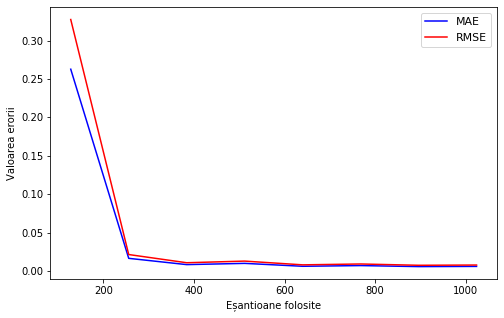

In [78]:
plt.figure(figsize=(8,5))

plt.plot(x, y1, '-b', label = 'MAE')
plt.plot(x, y2,'-r', label = 'RMSE')
plt.legend(loc="upper right", prop={'size': 11})
plt.xlabel('Eșantioane folosite')
plt.ylabel('Valoarea erorii')
plt.plot()
plt.savefig('sine_sum_samples_used_mae_rmse_100_1000_100.png')

In [ ]:
plt.plot(grouped_by['MAE'])
plt.plot(grouped_, c = 'red')
plt.savefig('sine_sum_first_test_overlap.png')
plt.show()

index pe x si pe y pun orice coloana de aici (eroarea, timp de esantioane)
samples_used + eroarea
frontback

In [24]:
df_cut = df[['MAE', 'RMSE', 'Fr1', 'Am1', 'Fr2', 'Am2']]

In [59]:
np.max(df_cut['MAE'])
#df.groupby('Număr de eșantioane folosit')['MAE', 'RMSE', 'Timp antrenare', 'Timp predicție'].mean()
df[(df.MAE > 1) & (df['Număr de eșantioane folosit'] == 896)]
df[df.MAE > 15].groupby('Număr de eșantioane folosit')['Fr1','Fr2','Am1','Am2', 'MAE', 'RMSE', 'Timp antrenare'].mean()

Fr1    Fr2    Am1    Am2        MAE       RMSE  \
Număr de eșantioane folosit                                                     
128                          150.0  150.0  487.5  487.5  81.028755  98.418954   

                             Timp antrenare  
Număr de eșantioane folosit                  
128                                0.007596

NameError: name 'image_destination_path' is not defined

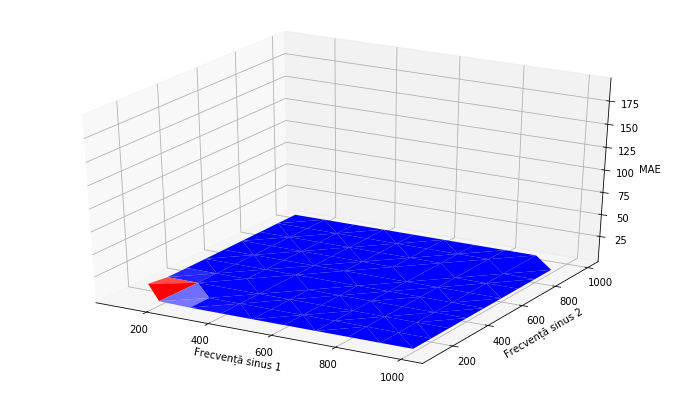

In [23]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 7

X = np.array(df_cut['Fr1'])
Y = np.array(df_cut['Fr2'])
Z = np.array(df_cut['MAE'])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel='Frecvență sinus 1', ylabel = 'Frecvență sinus 2', zlabel='MAE')
tr = ax.plot_trisurf(X, Y, Z, cmap='bwr', antialiased=True)


#ax.scatter(X, Y, Z, c=Z, cmap='BrBG', linewidth=1)
plt.savefig(image_destination_path)

In [63]:
df_samples_used = df.groupby('Număr de eșantioane folosit')['MAE', 'RMSE', 'Timp antrenare', 'Timp predicție'].mean()
df_samples_used.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &       MAE &      RMSE &  Timp antrenare &  Timp predicție \\\\\nNumăr de eșantioane folosit &           &           &                 &                 \\\\\n\\midrule\n128                         &  0.262719 &  0.327329 &        0.007635 &        0.003125 \\\\\n256                         &  0.016801 &  0.021731 &        0.010000 &        0.003217 \\\\\n384                         &  0.008640 &  0.011073 &        0.012887 &        0.003224 \\\\\n512                         &  0.010256 &  0.013209 &        0.015193 &        0.003307 \\\\\n640                         &  0.006478 &  0.008336 &        0.016966 &        0.003263 \\\\\n768                         &  0.007379 &  0.009461 &        0.018872 &        0.003253 \\\\\n896                         &  0.006054 &  0.007769 &        0.021607 &        0.003272 \\\\\n1024                        &  0.006309 &  0.008093 &        0.022501 &        0.003251 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [48]:
df_samples_used

MAE      RMSE  Timp antrenare  \
Număr de eșantioane folosit                                       
128                          0.262719  0.327329        0.007635   
256                          0.016801  0.021731        0.010000   
384                          0.008640  0.011073        0.012887   
512                          0.010256  0.013209        0.015193   
640                          0.006478  0.008336        0.016966   
768                          0.007379  0.009461        0.018872   
896                          0.006054  0.007769        0.021607   
1024                         0.006309  0.008093        0.022501   

                             Timp predicție  
Număr de eșantioane folosit                  
128                                0.003125  
256                                0.003217  
384                                0.003224  
512                                0.003307  
640                                0.003263  
768                                0.003253  
896                                0.003272  
1024                               0.003251

In [49]:
def highlight_max(s):    
    is_max = s == s.min()
    return ['background-color: cyan' if v else '' for v in is_max]

def highlight_min(s):    
    is_max = s == s.max()
    return ['background-color: crimson' if v else '' for v in is_max]
 
df_samples_used.style.apply(highlight_max)
#df_samples_used.style.apply(highlight_min)

In [43]:
print(df_samples_used.to_latex(index=True))

\begin{tabular}{lrr}
\toprule
{} &       MAE &      RMSE \\
Număr de eșantioane folosit &           &           \\
\midrule
128                         &  0.262719 &  0.327329 \\
256                         &  0.016801 &  0.021731 \\
384                         &  0.008640 &  0.011073 \\
512                         &  0.010256 &  0.013209 \\
640                         &  0.006478 &  0.008336 \\
768                         &  0.007379 &  0.009461 \\
896                         &  0.006054 &  0.007769 \\
1024                        &  0.006309 &  0.008093 \\
\bottomrule
\end{tabular}



In [16]:
df_samples_used